In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## 1 Load and data processing

In [23]:
data = pd.read_csv('../src/data/DS_Adult_Autism_Data.csv')

print("--- Shape of the dataset ---\n")
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}\n")
data.info()


--- Shape of the dataset ---

Number of rows 704
Number of columns 20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         700 non-null    float64
 1   A2_Score         701 non-null    float64
 2   A3_Score         701 non-null    float64
 3   A4_Score         701 non-null    float64
 4   A5_Score         704 non-null    int64  
 5   A6_Score         702 non-null    float64
 6   A7_Score         699 non-null    float64
 7   A8_Score         703 non-null    float64
 8   A9_Score         701 non-null    float64
 9   A10_Score        703 non-null    float64
 10  Age              698 non-null    float64
 11  Gender           701 non-null    object 
 12  Ethnicity        604 non-null    object 
 13  Jundice          700 non-null    object 
 14  Family           699 non-null    object 
 15  Country_of_res   700 non-null    obje

In [24]:
# Convert to lowercase the dataset
data.columns = data.columns.str.lower()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.lower()

data

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jundice,family,country_of_res,used_app_before,age_desc,relation,asd
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,white-european,no,no,'united states',no,'18 and more',self,no
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,latino,no,yes,brazil,no,'18 and more',self,no
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,latino,yes,yes,spain,no,'18 and more',parent,yes
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,white-european,no,yes,'united states',no,'18 and more',self,no
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,egypt,no,'18 and more',NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,25.0,f,white-european,no,no,russia,no,'18 and more',self,yes
700,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,34.0,m,hispanic,no,no,mexico,no,'18 and more',parent,no
701,1.0,0.0,1.0,1.0,1,0.0,1.0,1.0,0.0,1.0,24.0,f,NaN,no,no,russia,no,'18 and more',NaN,yes
702,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1.0,1.0,35.0,m,'south asian',no,no,pakistan,no,'18 and more',self,no


we can identify some data issues related with data types. Let's review it more in detail

In [ ]:
for col in data.columns:
    print(f"--- {col} ---")
    print(data[col].nunique())

--- a1_score ---
2
--- a2_score ---
2
--- a3_score ---
2
--- a4_score ---
2
--- a5_score ---
2
--- a6_score ---
2
--- a7_score ---
2
--- a8_score ---
2
--- a9_score ---
2
--- a10_score ---
2
--- age ---
46
--- gender ---
2
--- ethnicity ---
10
--- jundice ---
2
--- family ---
2
--- country_of_res ---
67
--- used_app_before ---
2
--- age_desc ---
1
--- relation ---
5
--- asd ---
2


Removing age_desc variable because it has an identical value in all rows and it won't be relevant for the model

In [26]:
data.drop(columns=['age_desc'], inplace=True)

In [ ]:
# Classifying variables by type
continuous, discretes, categoricals, temporary, possible_mixed = classify_variables(data)
print("\n")
print(f"--- Continuous values ---\n{continuous}")
print("\n")
print(f"--- Categorical values ---\n{categoricals}")
print("\n")
print(f"--- Discretes values ---\n{discretes}")

	Type of Variables
There are 1 continous variables
There are 10 discrete variables
There are 8 categorical variables
There are 0 temporary variables
There are 0 possible mixed variables


--- Continuous values ---
['age']


--- Categorical values ---
['gender', 'ethnicity', 'jundice', 'family', 'country_of_res', 'used_app_before', 'relation', 'asd']


--- Discretes values ---
['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score', 'a7_score', 'a8_score', 'a9_score', 'a10_score']


## 2 Check for missing or invalid alues

In [28]:
# Checking nan values

variable_types = ['Continuous', 'Discrete', 'Categorical']
variables = [continuous, discretes, categoricals, temporary]
nan_values(data, variable_types, variables)

	Continuous Variables
age: 0.85%


	Discrete Variables
a1_score: 0.57%
a2_score: 0.43%
a3_score: 0.43%
a4_score: 0.43%
a6_score: 0.28%
a7_score: 0.71%
a8_score: 0.14%
a9_score: 0.43%
a10_score: 0.14%


	Categorical Variables
gender: 0.43%
ethnicity: 14.20%
jundice: 0.57%
family: 0.71%
country_of_res: 0.57%
used_app_before: 0.43%
relation: 13.78%




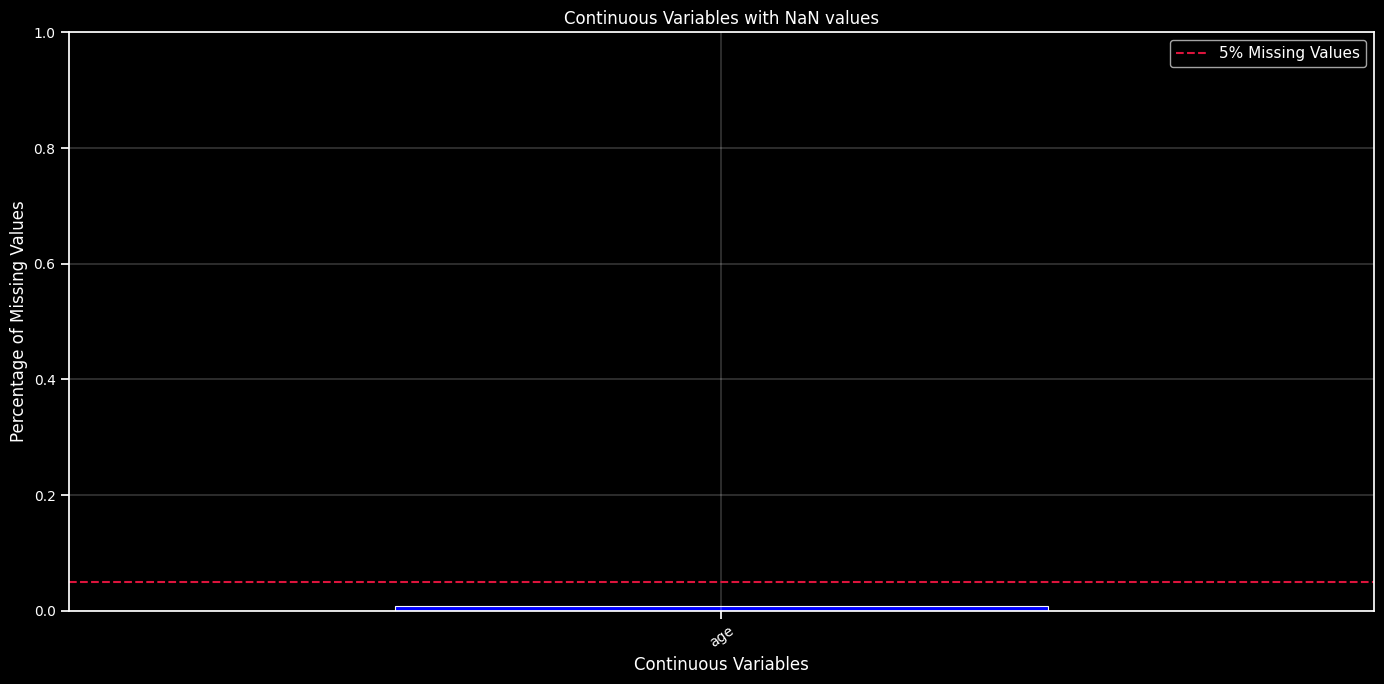

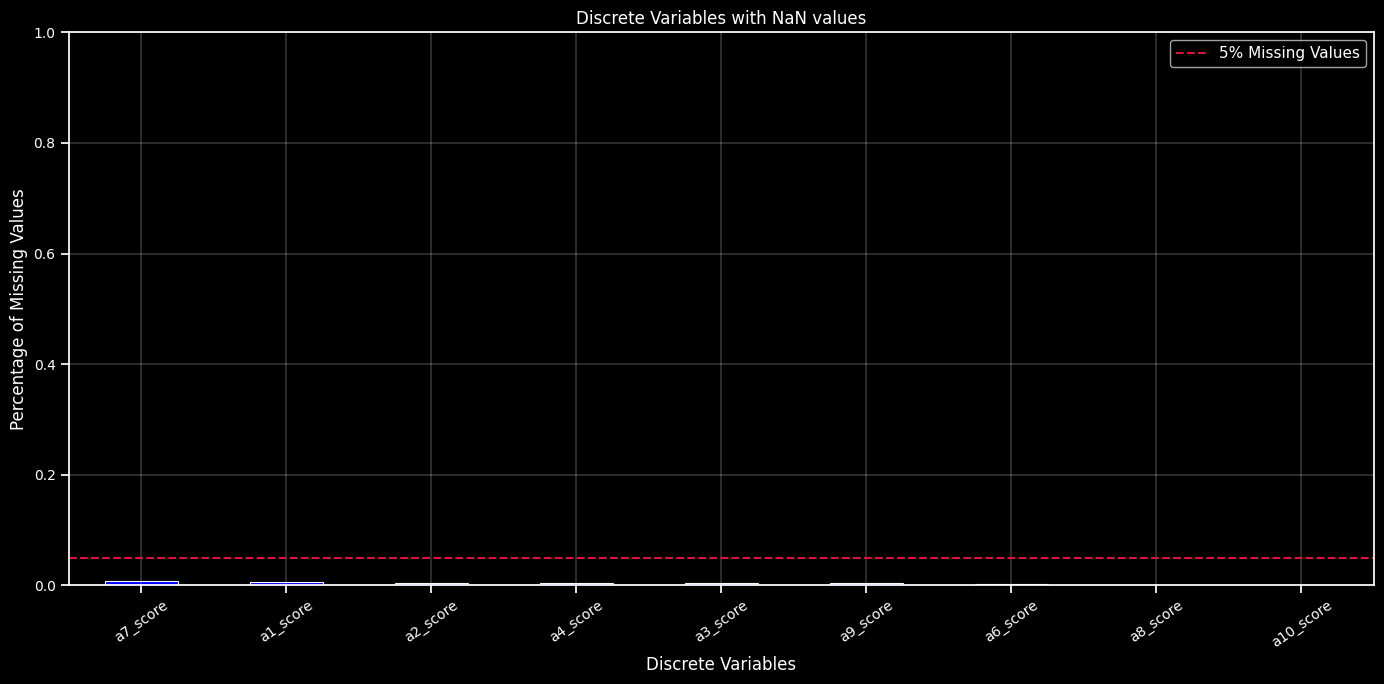

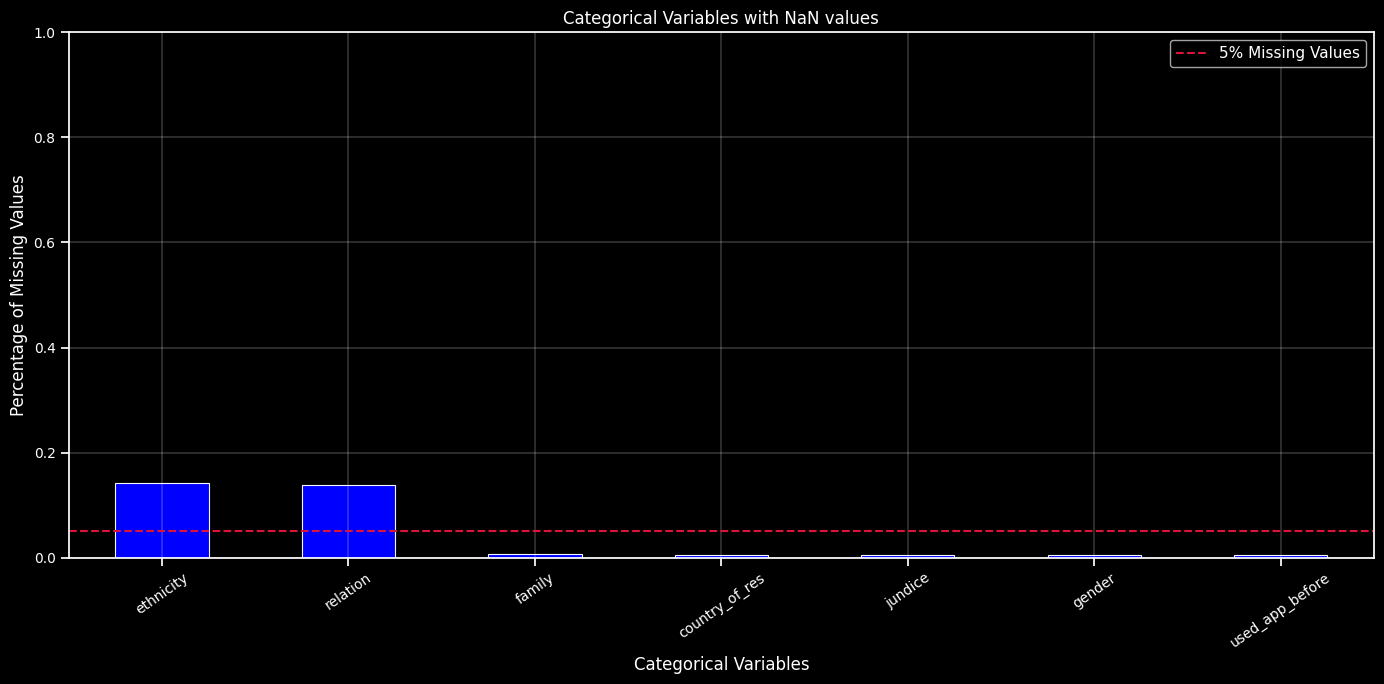

In [29]:
plot_missing_value_distribution(data, variable_types, variables)

As we can see, all variables have nan values. Moreover, we can identify 2 variables with more than 5% of null values: ethnicitny and relation.

### Analizing Continuos Variables

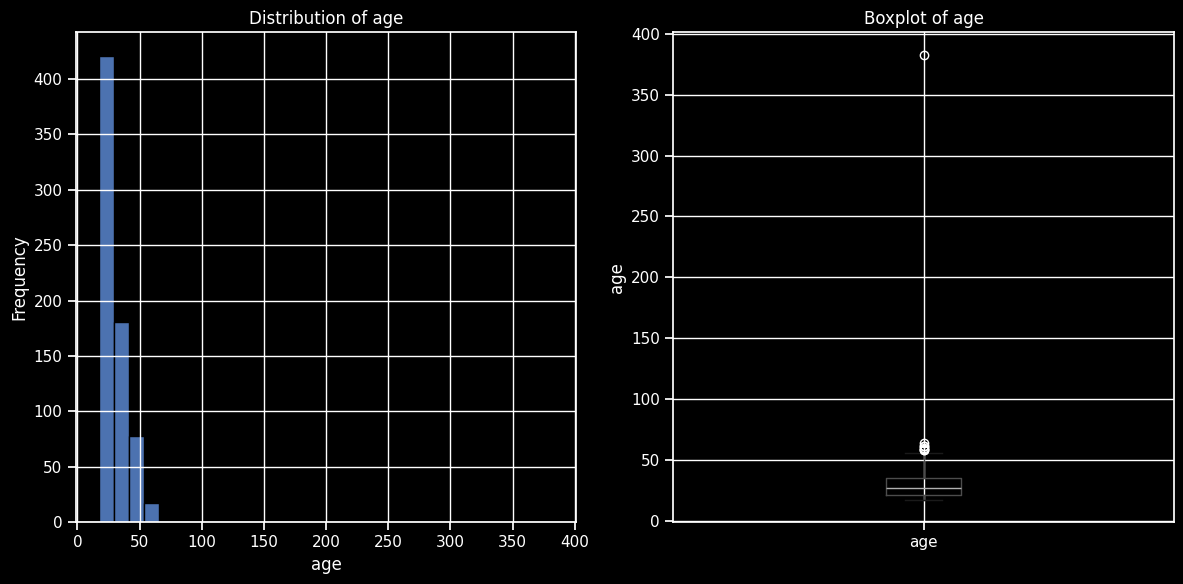

52    383.0
Name: age, dtype: float64


In [30]:
for var in continuous:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    data[var].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    data.boxplot(column=var)
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

    plt.tight_layout()
    plt.show()

print(data[data['age'] > 100]['age'])

We can see that the average of people that has taken the test is around 30. However, it seems like this variable has a value of 383, so that it's impossible a person has that age. Hence, we are going to proceed to remove this row

In [31]:
# Removing outlier
data.drop(index = 52, inplace = True)
data.reset_index(inplace = True)

### Analizing Categorical Variables

In [32]:
# Frequency counts of each category for categorical features
for col in categoricals:
    print(f"--- {col} ---")
    print(data[col].value_counts(dropna=False))
    print("\n")
    print(data[col].value_counts(dropna=False, normalize=True))
    print("\n")

--- gender ---
gender
m      366
f      334
NaN      3
Name: count, dtype: int64


gender
m      0.520626
f      0.475107
NaN    0.004267
Name: proportion, dtype: float64


--- ethnicity ---
ethnicity
white-european       231
asian                122
NaN                  100
'middle eastern '     90
black                 43
'south asian'         36
others                31
latino                20
hispanic              13
pasifika              11
turkish                6
Name: count, dtype: int64


ethnicity
white-european       0.328592
asian                0.173542
NaN                  0.142248
'middle eastern '    0.128023
black                0.061166
'south asian'        0.051209
others               0.044097
latino               0.028450
hispanic             0.018492
pasifika             0.015647
turkish              0.008535
Name: proportion, dtype: float64


--- jundice ---
jundice
no     630
yes     69
NaN      4
Name: count, dtype: int64


jundice
no     0.896159
yes    0.098

We can see that several variables have missing values, especifically in the categorical features where ethnicity (14.20%) and relation (13.78%) have the highest proportion of missing values. In this case, we are going to replace categorical variables with nan values such as gender, ethnicity, country_of_res, relation   to the 'unknown' label. Furthermore, some features in ethnicity, country_of_res and relation has inconsistent formatting. Finally, we are going to encode the features 'yes' and 'no' with 1 and 0 respectivelly, the same for 'm' and 'f' in gender.

In [33]:
# Encoding categorical variables
data = data.replace({'yes': 1, 'no': 0, 'm': 1, 'f': 0})

# Fill missing values for categorical columns with 'unknown' label and remove special characters
categorical_with_nan = ['ethnicity', 'country_of_res', 'relation',]
for col in categorical_with_nan:
    data[col] = data[col].fillna('unknown')
    data[col] = data[col].str.replace("'", "").str.strip()

# Verify changes
for col in categoricals:
    print(f"--- {col} ---")
    print(data[col].value_counts(dropna=False))
    print("\n")

--- gender ---
gender
1.0    366
0.0    334
NaN      3
Name: count, dtype: int64


--- ethnicity ---
ethnicity
white-european    231
asian             122
unknown           100
middle eastern     90
black              43
south asian        36
others             31
latino             20
hispanic           13
pasifika           11
turkish             6
Name: count, dtype: int64


--- jundice ---
jundice
0.0    630
1.0     69
NaN      4
Name: count, dtype: int64


--- family ---
family
0.0    608
1.0     90
NaN      5
Name: count, dtype: int64


--- country_of_res ---
country_of_res
united states           113
united arab emirates     81
india                    81
new zealand              80
united kingdom           77
                       ... 
angola                    1
azerbaijan                1
iraq                      1
czech republic            1
cyprus                    1
Name: count, Length: 68, dtype: int64


--- used_app_before ---
used_app_before
0.0    688
1.0     12
NaN

/tmp/ipykernel_286590/2384965010.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'yes': 1, 'no': 0, 'm': 1, 'f': 0})


In [34]:
data.isnull().sum()

index              0
a1_score           4
a2_score           3
a3_score           3
a4_score           3
a5_score           0
a6_score           2
a7_score           5
a8_score           1
a9_score           3
a10_score          1
age                6
gender             3
ethnicity          0
jundice            4
family             5
country_of_res     0
used_app_before    3
relation           0
asd                0
dtype: int64

### Analizing discretes variables

In [35]:
# Verify changes
for col in discretes:
    print(f"--- {col} ---")
    print(data[col].value_counts(dropna=False))
    print("\n")

--- a1_score ---
a1_score
1.0    506
0.0    193
NaN      4
Name: count, dtype: int64


--- a2_score ---
a2_score
0.0    382
1.0    318
NaN      3
Name: count, dtype: int64


--- a3_score ---
a3_score
0.0    380
1.0    320
NaN      3
Name: count, dtype: int64


--- a4_score ---
a4_score
0.0    353
1.0    347
NaN      3
Name: count, dtype: int64


--- a5_score ---
a5_score
0    352
1    351
Name: count, dtype: int64


--- a6_score ---
a6_score
0.0    501
1.0    200
NaN      2
Name: count, dtype: int64


--- a7_score ---
a7_score
0.0    406
1.0    292
NaN      5
Name: count, dtype: int64


--- a8_score ---
a8_score
1.0    456
0.0    246
NaN      1
Name: count, dtype: int64


--- a9_score ---
a9_score
0.0    473
1.0    227
NaN      3
Name: count, dtype: int64


--- a10_score ---
a10_score
1.0    404
0.0    298
NaN      1
Name: count, dtype: int64




It seems could be related to a Missing Data not at Random (MNAR), because it is more related to Autism study purpose where people did'n fill out the test.

In terms about clinical or health data, I believe that every measurement can be a critil indicator of a patient and using imputation methods is like we will assume that all patients are similar. We have to analize carefully the data and not understanding their context can introduce errors or can lead in biased results affecting the patient care.

For the case study, taking in mind that there are few nan values, we are going to remove it from the dataset to avoid introduce bias.

In [49]:
# Drop nan values
data = data.dropna()
data.isnull().sum()

a1_score           0
a2_score           0
a3_score           0
a4_score           0
a5_score           0
a6_score           0
a7_score           0
a8_score           0
a9_score           0
a10_score          0
age                0
gender             0
ethnicity          0
jundice            0
family             0
country_of_res     0
used_app_before    0
relation           0
asd                0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 0 to 702
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   a1_score         659 non-null    float64
 1   a2_score         659 non-null    float64
 2   a3_score         659 non-null    float64
 3   a4_score         659 non-null    float64
 4   a5_score         659 non-null    int64  
 5   a6_score         659 non-null    float64
 6   a7_score         659 non-null    float64
 7   a8_score         659 non-null    float64
 8   a9_score         659 non-null    float64
 9   a10_score        659 non-null    float64
 10  age              659 non-null    float64
 11  gender           659 non-null    float64
 12  ethnicity        659 non-null    object 
 13  jundice          659 non-null    float64
 14  family           659 non-null    float64
 15  country_of_res   659 non-null    object 
 16  used_app_before  659 non-null    float64
 17  relation         659 

In [54]:
# Casting the type of the variables
data = data.astype({
    'a1_score': 'int64',
    'a1_score': 'int64',
    'a2_score': 'int64',
    'a3_score': 'int64',
    'a4_score': 'int64',
    'a5_score': 'int64',
    'a6_score': 'int64',
    'a7_score': 'int64',
    'a8_score': 'int64',
    'a9_score': 'int64',
    'a10_score': 'int64',
    'age': 'int64',
    'gender': 'category',
    'ethnicity': 'category',
    'jundice': 'category',
    'family': 'category',
    'country_of_res': 'category',
    'used_app_before': 'category',
    'relation': 'category',
    'asd': 'category'
})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 0 to 702
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   a1_score         659 non-null    int64   
 1   a2_score         659 non-null    int64   
 2   a3_score         659 non-null    int64   
 3   a4_score         659 non-null    int64   
 4   a5_score         659 non-null    int64   
 5   a6_score         659 non-null    int64   
 6   a7_score         659 non-null    int64   
 7   a8_score         659 non-null    int64   
 8   a9_score         659 non-null    int64   
 9   a10_score        659 non-null    int64   
 10  age              659 non-null    int64   
 11  gender           659 non-null    category
 12  ethnicity        659 non-null    category
 13  jundice          659 non-null    category
 14  family           659 non-null    category
 15  country_of_res   659 non-null    category
 16  used_app_before  659 non-null    category
 17  re

In [ ]:
# Save the file as a csv in the data folder
data.to_csv('../src/data/preprocessed_data.csv', index=False)